# Download ImageCollection
Here we download an imagecollection using the multiprocessing API

> Note: this module uses the python multiprocessing API stopping the multiprocessing API can cause the kernel to become
> buggy, due to the worker pool not being closed properly. Stopping the IPython kernel and starting it again after a short
> wait can resolve these issues

In [1]:
! pip install retry pathos

     |████████████████████████████████| 81 kB 640 kB/s eta 0:00:01
     |████████████████████████████████| 98 kB 641 kB/s eta 0:00:01
     |████████████████████████████████| 86 kB 881 kB/s eta 0:00:011
     |████████████████████████████████| 128 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 474 kB/s eta 0:00:01


In [1]:
from pathlib import Path
import sys

import ee
import geemap
from geojson import Polygon

sys.path.append(str(Path.cwd().parent.parent.parent / "ee-packages-py"))

from eepackages.applications import bathymetry
from eepackages.utils import download_image_collection, download_image_collection_thumb

In [2]:
Map = geemap.Map(center=(52.97, 4.74), zoom=11)
bounds = ee.Geometry(Polygon([[
    (4.574518432617185, 52.91662291147939),
    (4.90548156738281, 52.91662291147939),
    (4.90548156738281, 53.02331125248889),
    (4.574518432617185, 53.02331125248889),
    (4.574518432617185, 52.91662291147939)
]]))
scale = Map.getScale()
# scale = 30

sdb = bathymetry.Bathymetry()
Map.addLayer(bounds)

In [3]:
scale = Map.getScale()

# Parameters 
start_date = '2016-01-01'
stop_date = '2018-01-01'

image = sdb.compute_intertidal_depth(
    bounds=bounds,
    start=start_date,
    stop=stop_date,
    scale=scale,
    missions=['S2', 'L8'],
    # filter: ee.Filter.dayOfYear(7*30, 9*30), # summer-only
    filter_masked=False, 
    # filterMasked: true, 
    # filterMaskedFraction: 0.5,
    skip_scene_boundary_fix=False,
    skip_neighborhood_search=False,
    neighborhood_search_parameters={"erosion": 0, "dilation": 0, "weight": 50},
    bounds_buffer=0,
    water_index_min=-0.05,
    water_index_max=0.15,

    # lowerCdfBoundary: 45,
    # upperCdfBoundary: 50
)  # .reproject(ee.Projection("EPSG:3857").atScale(90))

min = 0.04
max = 0.2
Map.addLayer(sdb.composite, { "min": min, "max": max }, 'red-green-blue')
Map

Map(center=[52.97, 4.74], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…

In [4]:
help(download_image_collection)

Help on function download_image_collection in module eepackages.utils:

download_image_collection(ic: ee.imagecollection.ImageCollection, name_prefix: str = 'ic_', out_dir: Optional[pathlib.Path] = None, pool_size: int = 25, download_kwargs: Optional[Dict[str, Any]] = None) -> None
    Download images in image collection. Only works for images in the collection that are < 32M
    and grid dimension < 10000, documented at 
    https://developers.google.com/earth-engine/apidocs/ee-image-getdownloadurl.
    
    args:
        ic (ee.ImageCollection): ImageCollection to download.
        name_prefix (str): prefix for the filename of the downloaded objects.
        out_dir (Optional(Path)): pathlib object referring to output dir.
        pool_size (int): multiprocessing pool size.
        download_kwargs (Optional(Dict(str, Any))): keyword arguments used in
            [getDownloadUrl](https://developers.google.com/earth-engine/apidocs/ee-image-getdownloadurl).



In [5]:
# Adding logging to see debug logs from the image downloads, some warnings will appear.
import logging

logging.basicConfig()

import multiprocess.context as ctx
ctx._force_start_method('spawn')

path = Path.cwd() / "output"
ic = sdb._raw_images.map(lambda img: img.clip(bounds))
download_image_collection(ic, out_dir=path, download_kwargs={"format": "GEO_TIFF", "scale": 30})

In [6]:
import os
path = Path.cwd() / "output"
downloads = os.listdir(path)
print(downloads)

['ic_1509100425660.tif', 'ic_1494932002630.tif', 'ic_1462099990000.tif', 'ic_1475059822460.tif', 'ic_1504003821460.tif', 'ic_1459507824460.tif', 'ic_1511865216690.tif', 'ic_1471604017060.tif', 'ic_1495881551980.tif', 'ic_1455186806060.tif', 'ic_1503570812560.tif', 'ic_1486982004250.tif', 'ic_1474195822456.tif', 'ic_1487156167471.tif', 'ic_1472468141340.tif', 'ic_1473332056359.tif', 'ic_1497524105260.tif', 'ic_1498041191740.tif', 'ic_1491734348960.tif', 'ic_1482834821520.tif', 'ic_1462964023672.tif', 'ic_1460371825461.tif', 'ic_1474195822460.tif', 'ic_1494499141282.tif', 'ic_1461235829000.tif', 'ic_1462098784320.tif', 'ic_1486204779010.tif', 'ic_1455187915455.tif', 'ic_1465468759510.tif', 'ic_1469010806180.tif', 'ic_1453027183410.tif', 'ic_1479380005460.tif', 'ic_1495796118080.tif', 'ic_1477910399220.tif', 'logging', 'ic_1461235829463.tif', 'ic_1471604017065.tif', 'ic_1479292798510.tif', 'ic_1480070027900.tif', 'ic_1504436115080.tif', 'ic_1490611821460.tif', 'ic_1495276376850.tif', 'ic_

In [7]:
!pip install rasterio

     |████████████████████████████████| 19.2 MB 8.2 MB/s eta 0:00:01     |██████████████████████████████▏ | 18.1 MB 8.2 MB/s eta 0:00:01


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


shape: (5, 414, 751)
band names: ['swir', 'nir', 'red', 'green', 'blue']
Normalized bands
0.0 - 1.0 mean: 0.084280506
0.0 - 1.0 mean: 0.09142137
0.0 - 1.0 mean: 0.08292296


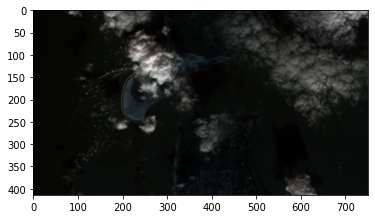

In [8]:
from matplotlib import pyplot
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show

import glob

example_image_path = str(path / downloads[0])
array = rasterio.open(example_image_path).read()
print(f"shape: {array.shape}")
print(f"band names: {ee.Image(sdb._raw_images.toList(sdb._raw_images.size()).get(0)).bandNames().getInfo()}")

blue = array[2,:,:]
green = array[3,:,:]
red = array[4,:,:]

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

# Let's see how our color composite looks like
pyplot.imshow(rgb)

In [9]:
help(download_image_collection_thumb)

Help on function download_image_collection_thumb in module eepackages.utils:

download_image_collection_thumb(ic: ee.imagecollection.ImageCollection, name_prefix: str = 'ic_', out_dir: Optional[pathlib.Path] = None, pool_size: int = 25, download_kwargs: Optional[Dict[str, Any]] = None) -> None
    Download thumb images in and image collection. Only works for images in the collection that are < 32M
    and grid dimension < 10000, documented at
    https://developers.google.com/earth-engine/apidocs/ee-image-getthumburl.
    
    args:
        ic (ee.ImageCollection): ImageCollection to download.
        name_prefix (str): prefix for the filename of the downloaded objects.
        out_dir (Optional(Path)): pathlib object referring to output dir.
        pool_size (int): multiprocessing pool size.
        download_kwargs (Optional(Dict(str, Any))): keyword arguments used in
            [getDownloadUrl](https://developers.google.com/earth-engine/apidocs/ee-image-getthumburl).



In [10]:
# Adding logging to see debug logs from the image downloads, some warnings will appear.
import logging
logging.basicConfig()

thumb_path = Path.cwd() / "out_thumb"
ic = sdb._raw_images.select("red", "green", "blue").map(lambda img: img.clip(bounds))
download_image_collection_thumb(ic, out_dir=thumb_path, download_kwargs={
    "format": "PNG",
    "min": [0, 0, 0],
    "max": [1, 1, 1],
    "scale": 30
})

In [11]:
import os
downloads_thumb = os.listdir(thumb_path)
print(downloads_thumb)

['ic_1487156167471.png', 'ic_1497524105260.png', 'ic_1506163822460.png', 'ic_1503571960950.png', 'ic_1469010806180.png', 'ic_1457779837460.png', 'ic_1453027183410.png', 'ic_1461235829463.png', 'ic_1462703952840.png', 'ic_1479380005463.png', 'ic_1462098784320.png', 'ic_1488364398710.png', 'ic_1494499141282.png', 'ic_1491734348960.png', 'ic_1503570812560.png', 'ic_1495796118080.png', 'ic_1482836127361.png', 'ic_1504003821460.png', 'ic_1480070027900.png', 'ic_1484564035461.png', 'ic_1467628399920.png', 'ic_1475059822460.png', 'ic_1455187915455.png', 'ic_1462964023000.png', 'ic_1469876018067.png', 'ic_1498041191740.png', 'ic_1460371825461.png', 'ic_1491129181530.png', 'ic_1502708117080.png', 'ic_1486204779010.png', 'ic_1479292798510.png', 'ic_1513508073460.png', 'ic_1459507824460.png', 'ic_1477910399220.png', 'ic_1455186806060.png', 'ic_1509100425660.png', 'ic_1470739830455.png', 'ic_1486982004250.png', 'ic_1492340161980.png', 'ic_1479380005460.png', 'ic_1468147967556.png', 'ic_15109159944

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['show', 'array', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


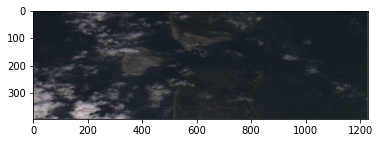

In [12]:
%pylab inline
import matplotlib.image as mpimg
img = mpimg.imread(str(thumb_path / 'ic_1497524105260.png'))
imgplot = pyplot.imshow(img)
pyplot.show()